# 積み上げ棒グラフの練習

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import japanize_matplotlib

In [36]:
data = {
    "年月": ["202203", "202203", "202209", "202209"],
    "年代": ["10", "20", "10", "20"],
    "値": [100, 150, 200, 300]
}
df = pd.DataFrame(data)

In [44]:
p_df = df.pivot(index="年月", columns="年代", values="値")
p_df

年代,10,20
年月,,
202203,100,150
202209,200,300


In [71]:
print(list(p_df.columns))


['10', '20']


値     
年代       10   20
年月              
202203  100  150
202209  200  300

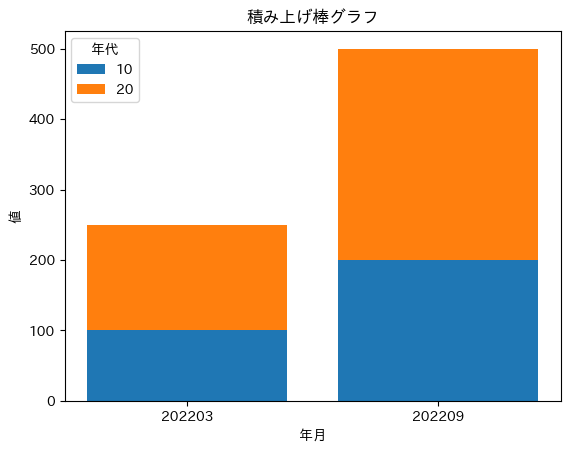

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# データフレームの作成
data = {
    "年月": ["202203", "202203", "202209", "202209"],
    "年代": ["10", "20", "10", "20"],
    "値": [100, 150, 200, 300]
}
df = pd.DataFrame(data)

# 年月ごとに年代でグループ化して値を集計
grouped_df = df.groupby(['年月', '年代']).sum().unstack()
display(grouped_df.head())

# プロット用のFigureとAxを作成
fig, ax = plt.subplots()

# x軸の位置を設定
x = range(len(grouped_df))

# 積み上げの初期値をゼロに設定
bottom = [0] * len(grouped_df)

# 年代ごとにバーを積み上げてプロット
for age_group in grouped_df.columns.levels[1]:
    ax.bar(x, grouped_df[('値', age_group)], bottom=bottom, label=age_group)
    # 次の年代のバーを積み上げるためにbottomを更新
    bottom += grouped_df[('値', age_group)]

# グラフのラベルとタイトルを追加
ax.set_xlabel('年月')
ax.set_ylabel('値')
ax.set_title('積み上げ棒グラフ')
ax.set_xticks(x)
ax.set_xticklabels(grouped_df.index)
ax.legend(title='年代')

# グラフを表示
plt.show()


In [50]:
grouped_df = df.groupby(['年月', '年代']).sum().unstack()
grouped_df

値     
年代       10   20
年月              
202203  100  150
202209  200  300

値     
年代       10   20
年月              
202203  100  150
202209  200  300

KeyError: '10'

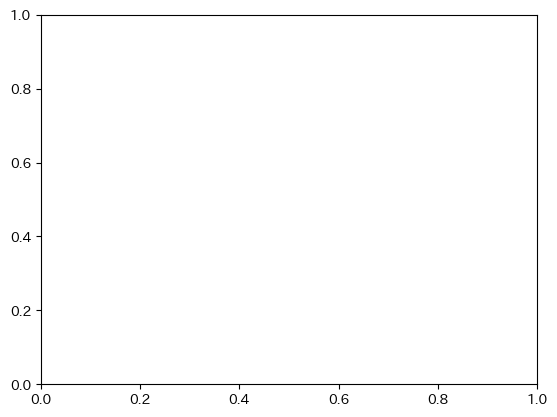

In [51]:
# 積み上げ棒グラフを描画
# プロット用のFigureとAxを作成
fig, ax = plt.subplots()
grouped_df = df.groupby(['年月', '年代']).sum().unstack()
display(grouped_df)
# x軸の位置を設定
x = range(len(grouped_df))

# 最初のバーをプロット
ax.bar(x, grouped_df["10"], label="10")

# 2つ目以降のバーを積み上げてプロット
ax.bar(x, grouped_df["20"], bottom=grouped_df["10"], label="20")

# グラフのラベルとタイトルを追加
ax.set_xlabel('年月')
ax.set_ylabel('値')
ax.set_title('積み上げ棒グラフ')
ax.set_xticks(x)
ax.set_xticklabels(p_df.index)
ax.legend(title='年代')

# グラフを表示
plt.show()

10
20
10
20


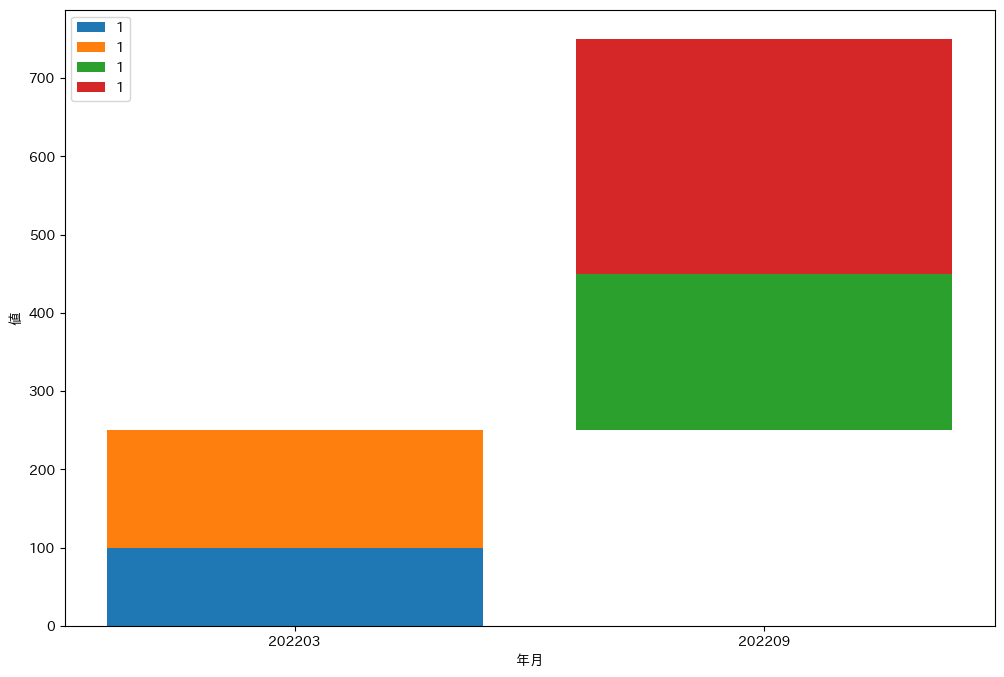

In [43]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))
era = df["年月"].unique()
tmp_df = df.copy()
for l in range(len(tmp_df)):
    print(tmp_df.iloc[l, 1])
    ax.bar(tmp_df.iloc[l, 0], tmp_df.iloc[l, 2], label="1", bottom=tmp_df.iloc[:l, 2].sum())
ax.set(xlabel="年月", ylabel="値")
ax.legend()
plt.show()

       年月  年代    値
0  202203  10  100
1  202203  20  150
10
20
       年月  年代    値
2  202209  10  200
3  202209  20  300
10
20


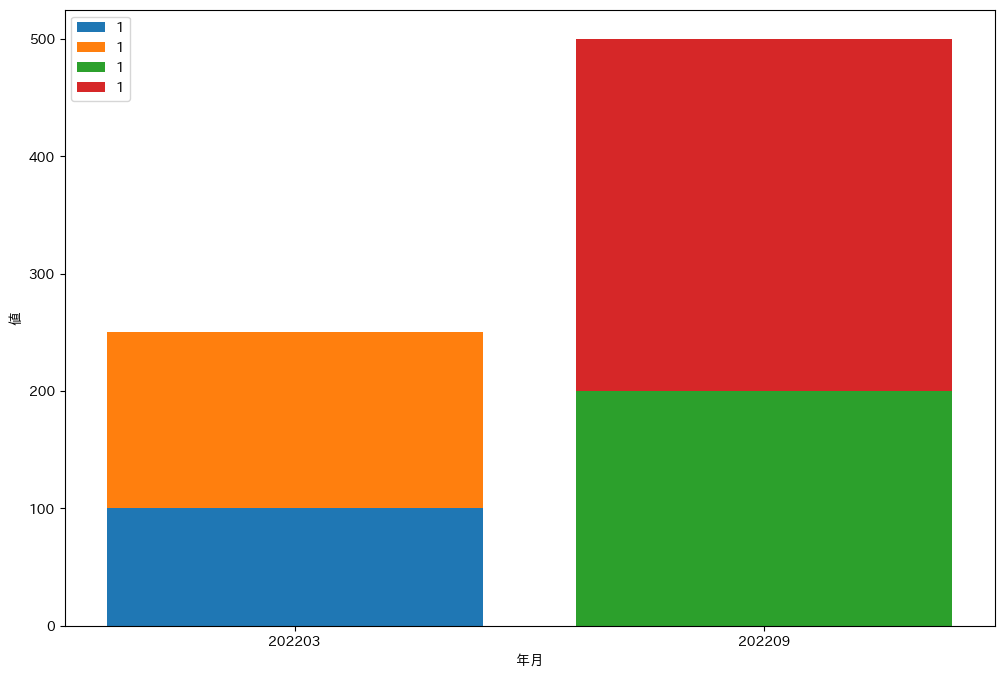

In [41]:
fig, ax = plt.subplots(1,1, figsize=(12, 8))
era = df["年月"].unique()
for e in era:
    tmp_df = df[df["年月"] == e]
    print(tmp_df)
    for l in range(len(tmp_df)):
        print(tmp_df.iloc[l, 1])
        ax.bar(e, tmp_df.iloc[l, 2], label="1", bottom=tmp_df.iloc[:l, 2].sum())
ax.set(xlabel="年月", ylabel="値")
ax.legend()
plt.show()